## Digit-Recognizer

### Imported package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random
from tensorflow.keras import layers, models

### Importing data

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
submission = pd.read_csv('../data/sample_submission.csv')

In [3]:
train_df.shape, test_df.shape, submission.shape

((42000, 785), (28000, 784), (28000, 2))

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [9]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


### Image making by number

In [10]:
number = random.randint(0, 42000) 
number

10086

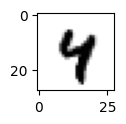

In [11]:
plt.figure(figsize=(1, 1))
plt.imshow(train_df.iloc[number, 1:].values.reshape(28, 28), cmap=plt.cm.binary)

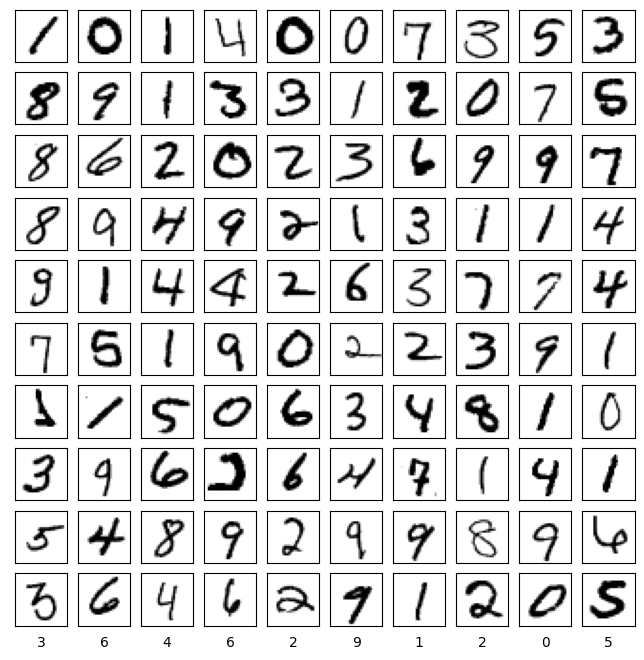

In [12]:
# code to show 100 images
plt.figure(figsize=(8, 8))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_df.iloc[i, 1:].values.reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_df.iloc[i, 0])

In [13]:
# converting number 0 to 256 to 0 to 1
x_train_df = train_df.iloc[:, 1:].values / 256
x_test_df = test_df.iloc[:, :].values / 256
x_train_df[number]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
y_train_df = train_df.iloc[:, 0].values
y_train_df[number]

4

In [15]:
x_train_df.shape, x_test_df.shape

((42000, 784), (28000, 784))

In [16]:
x_train_df[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Models 

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.2, random_state=42)

In [18]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.24609375, 0.98828125,
       0.47265625, 0.        , 0.        , 0.        , 0.     

In [19]:
y_train[0]

6

#### ANN

In [20]:
model=keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=10,
                    batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1050/1050 [==============================] - 5s 3ms/step - loss: 0.3624 - accuracy: 0.8868 - val_loss: 0.1703 - val_accuracy: 0.9496
Epoch 2/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1380 - accuracy: 0.9586 - val_loss: 0.1556 - val_accuracy: 0.9527
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0958 - accuracy: 0.9706 - val_loss: 0.1250 - val_accuracy: 0.9631
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0739 - accuracy: 0.9767 - val_loss: 0.1175 - val_accuracy: 0.9656
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0585 - accuracy: 0.9808 - val_loss: 0.0995 - val_accuracy: 0.9725
Epoch 6/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.1110 - val_accuracy: 0.9712
Epoch 7/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.1418 - val_accuracy:

In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

263/263 [==============================] - 1s 2ms/step - loss: 0.1393 - accuracy: 0.9708
Test Accuracy: 0.9708333611488342


In [24]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.362387,0.886786,0.170285,0.949643
1,0.137993,0.958631,0.155580,0.952738
2,0.095803,0.970625,0.124974,0.963095
3,0.073888,0.976667,0.117540,0.965595
4,0.058459,0.980774,0.099543,0.972500


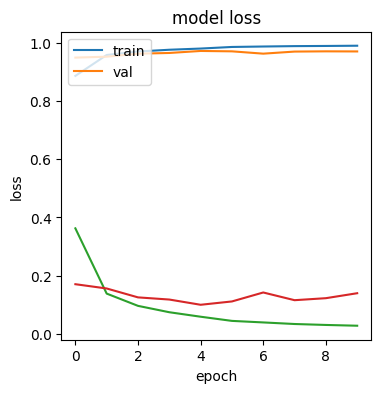

In [25]:
plt.figure(figsize=(4, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [26]:
y_predicted = model.predict(x_test)
y_predicted[0]

263/263 [==============================] - 0s 1ms/step


array([2.43561319e-03, 7.78800100e-02, 1.20058976e-01, 5.05717145e-03,
       4.33871086e-04, 1.04596424e-04, 8.19051129e-05, 3.03232088e-03,
       9.99173522e-01, 3.79603431e-02], dtype=float32)

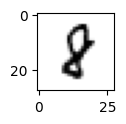

In [27]:
plt.figure(figsize=(1, 1))
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.cm.binary)

In [28]:
np.argmax(y_predicted[0])

8

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [30]:
y_predicted_labels[:20]

[8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4]

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[801,   0,   5,   1,   0,   4,   2,   0,   3,   0],
       [  0, 902,   3,   0,   0,   0,   1,   1,   2,   0],
       [  0,   2, 835,   4,   5,   0,   0,   0,   0,   0],
       [  2,   1,   7, 921,   0,   3,   0,   1,   1,   1],
       [  2,   0,   5,   1, 814,   1,   6,   2,   0,   8],
       [  1,   1,   0,  22,   0, 658,  12,   1,   3,   4],
       [  3,   1,   2,   0,   0,   1, 776,   0,   2,   0],
       [  0,   1,  16,   3,   3,   1,   0, 863,   0,   6],
       [  1,   7,  14,   5,   2,   4,   5,   1, 795,   1],
       [  1,   4,   5,  26,   6,   2,   0,   2,   2, 790]])>

Text(58.222222222222214, 0.5, 'Truth')

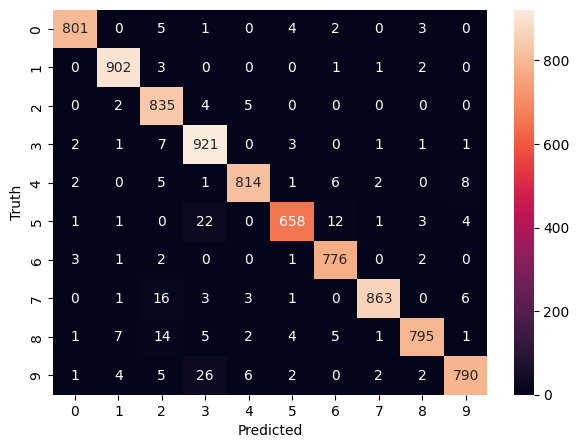

In [32]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### CNN

In [58]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),
                  activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [59]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
history = cnn_model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10,
              batch_size=32, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
1050/1050 [==============================] - 18s 16ms/step - loss: 0.2530 - accuracy: 0.9197 - val_loss: 0.1125 - val_accuracy: 0.9668
Epoch 2/10
1050/1050 [==============================] - 17s 17ms/step - loss: 0.0745 - accuracy: 0.9761 - val_loss: 0.0710 - val_accuracy: 0.9771
Epoch 3/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0519 - accuracy: 0.9841 - val_loss: 0.0505 - val_accuracy: 0.9844
Epoch 4/10
1050/1050 [==============================] - 28s 26ms/step - loss: 0.0401 - accuracy: 0.9871 - val_loss: 0.0528 - val_accuracy: 0.9833
Epoch 5/10
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0300 - accuracy: 0.9910 - val_loss: 0.0610 - val_accuracy: 0.9814
Epoch 6/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0476 - val_accuracy: 0.9846
Epoch 7/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0214 - accuracy: 0.9929 - val_loss: 0.0370 -

In [61]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.253000,0.919732,0.112540,0.966786
1,0.074521,0.976131,0.071004,0.977143
2,0.051863,0.984077,0.050545,0.984405
3,0.040079,0.987113,0.052814,0.983333
4,0.030005,0.991042,0.060951,0.981429


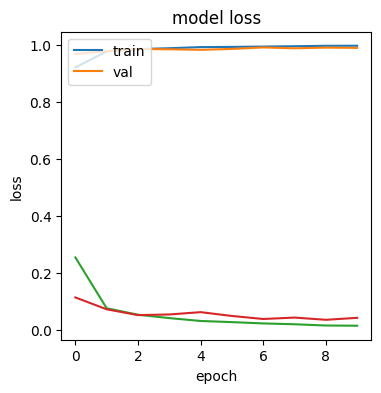

In [62]:
plt.figure(figsize=(4, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [63]:
test_loss, test_accuracy = cnn_model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f"Test Accuracy: {test_accuracy}")

263/263 [==============================] - 1s 5ms/step - loss: 0.0410 - accuracy: 0.9882
Test Accuracy: 0.9882143139839172


In [65]:
y_predicted = cnn_model.predict(x_test.reshape(-1, 28, 28, 1))

263/263 [==============================] - 2s 5ms/step


In [66]:
y_clsses = [np.argmax(i) for i in y_predicted]
y_clsses[:20]

[8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4]

In [67]:
y_test[:20]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4],
      dtype=int64)

In [68]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_clsses)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[814,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 905,   3,   0,   0,   0,   1,   0,   0,   0],
       [  0,   2, 838,   0,   2,   0,   0,   2,   1,   1],
       [  0,   0,   5, 923,   0,   4,   0,   1,   3,   1],
       [  2,   0,   0,   0, 833,   0,   2,   0,   0,   2],
       [  1,   0,   0,   3,   0, 692,   4,   0,   2,   0],
       [  2,   0,   0,   0,   1,   2, 780,   0,   0,   0],
       [  0,   5,   8,   1,   2,   0,   0, 875,   0,   2],
       [  2,   2,   3,   0,   2,   2,   0,   0, 822,   2],
       [  2,   2,   1,   1,   6,   3,   0,   1,   3, 819]])>

Text(58.222222222222214, 0.5, 'Truth')

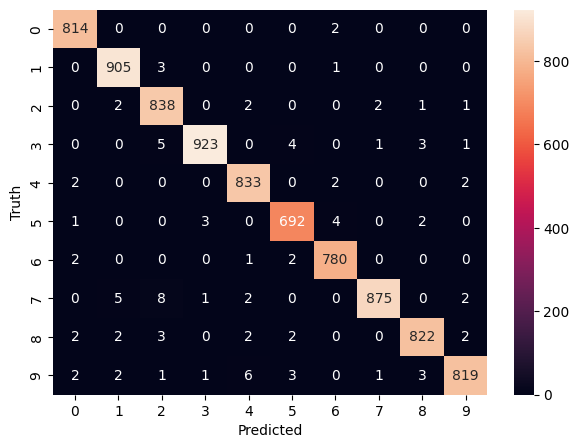

In [69]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Data Augmentation

In [84]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1)
])

In [85]:
model_data_augmentation = models.Sequential([
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3, 3),
                  activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [86]:
model_data_augmentation.compile(optimizer='adam',
                                loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
history =  model_data_augmentation.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10,
                            batch_size=32, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

In [88]:
test_loss, test_accuracy = model_data_augmentation.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f"Test Accuracy: {test_accuracy}")

In [89]:
y_predicted = model_data_augmentation.predict(x_test.reshape(-1, 28, 28, 1))

In [90]:
y_classes = [np.argmax(i) for i in y_predicted]
y_clsses[:20]

In [91]:
y_test[:20]

In [92]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_clsses)
cm

In [93]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')